## 2020 Israel Elections, Numerical Observations

In [163]:
import pandas as pd
import numpy as np

# read counted votes by city
df = pd.read_csv("https://media23.bechirot.gov.il/files/expc.csv", encoding='iso8859_8')

# establish list of parties
parties = df.columns[7:-1]

# sum votes and sort
top10 = df[parties].sum().sort_values(ascending=False).head(10)
top10

# extract call letters of top parties
call10 = top10.index.values
call10

df.head(2)

,סמל ועדה,שם ישוב,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ג,ודעם,...,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 37
0,3,אור הגנוז,1294,281,184,0,184,2,83,0,...,0,1,0,0,0,0,0,0,58,NaN
1,17,אחווה,1157,185,143,0,143,13,0,0,...,0,88,0,0,0,0,0,0,2,NaN


### OB1 - Places best fitting national voting pattern

- Which are the places the vote closest to the national average?
- What does it say about such places?
- Do they show a special kind of mix? living environment?
- Interview a person from such a place. Does he/she feels it?

In [164]:
# add column r1 for ratio of smillarity to overall results
# nature of r1 is still under question (how to compute)

he_valid = 'כשרים'
he_voters = 'מצביעים'
he_place = 'שם ישוב'

top10r = top10.divide(df[he_valid].sum())
def calcFit(r):
    return(r.filter(items=call10).divide(r[he_valid]) - top10r).abs().sum()

df['fit_index'] = df.apply(lambda x: calcFit(x), axis=1)
df_sig_places = df[df[he_voters]>5000]
df_sel_cols = df_sig_places[np.concatenate([[he_place, he_voters, he_valid, 'fit_index'], call10])]
df1 = df_sel_cols.sort_values(by=['fit_index'], ascending=True).head(10)
df1

,שם ישוב,מצביעים,כשרים,fit_index,מחל,פה,ודעם,שס,ג,אמת,ל,טב,נץ,ז
1212,מעטפות חיצוניות,329909,327406,0.226949,106945,97744,18045,23253,13376,24118,12806,27271,1702,622
217,רחובות,74296,73986,0.278015,25292,24095,257,5644,3283,4854,5204,4644,443,71
178,חיפה,145488,144625,0.279884,38464,50081,14915,4218,5604,10395,14893,5020,356,154
208,פתח תקווה,131620,130974,0.312605,47074,37258,190,10787,6339,5022,11412,11849,558,118
578,ירכא,6444,6325,0.335690,1860,1993,997,305,0,205,904,19,2,0
224,אזור,6730,6689,0.413033,2750,2148,24,739,76,339,317,231,33,2
270,חדרה,48251,47954,0.416564,21607,13046,214,4011,667,1887,4648,1498,180,36
350,ראש העין,33310,33216,0.421049,13336,11658,43,3146,740,1325,1081,1627,200,13
177,חולון,101584,101066,0.425037,42980,31303,163,10345,894,4606,7081,2914,364,92
695,חריש,5160,5135,0.426513,1669,1121,68,758,159,175,324,768,64,9


### OB2 - Places noteworthy for throwing votes to dumpster

- Which are the places where highest percentage of voters voted for parties that did not make it into the parliment?
- What does it say about such a place?
- Is it small? big? are they concentrated around specific areas?
- Is the order by magnitude (rather than percentage) radically different?

In [165]:
call9 = call10[0:9]

def calcEffective(r):
    return(r[he_valid] - r.filter(items=call9).sum())

df['lost_votes'] = df.apply(lambda x: calcEffective(x), axis=1)
df['lost_ratio'] = df.apply(lambda x: x['lost_votes'] / x[he_valid], axis=1)
df[df['lost_votes'] >= 5].sort_values(by=['lost_ratio'], ascending=False).head(10)

,סמל ועדה,שם ישוב,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ג,ודעם,...,ץ,ק,קי,קך,קץ,שס,Unnamed: 37,fit_index,lost_votes,lost_ratio
40,5,בית זיד,353,113,74,1,73,19,0,1,...,0,5,1,0,0,1,NaN,1.088081,7,0.095890
1078,18,גנאביב שבט,976,478,211,1,210,2,0,173,...,0,1,2,5,7,2,NaN,1.485909,19,0.090476
1122,6,ערב אל נעים,1335,517,285,6,279,3,0,103,...,1,0,0,0,3,3,NaN,0.809835,18,0.064516
1068,6,אבטליון,1275,308,233,0,233,35,0,7,...,0,0,0,0,0,0,NaN,0.917517,11,0.047210
180,18,יהל,1158,217,121,1,120,28,0,1,...,0,0,0,0,0,0,NaN,0.923355,5,0.041667
513,18,שני,1287,466,319,0,319,26,2,0,...,0,1,0,0,0,3,NaN,0.542206,12,0.037618
55,4,גשור,4022,220,153,2,151,14,0,0,...,0,0,0,0,0,2,NaN,0.773078,5,0.033113
181,2,ייטב,3607,205,160,1,159,2,5,0,...,0,0,0,0,0,1,NaN,1.053438,5,0.031447
890,3,עגר,4501,1707,677,8,669,168,0,96,...,2,1,1,2,0,183,NaN,0.834128,16,0.023916
625,18,קבועה שבט,1234,754,430,3,427,0,0,406,...,0,1,0,1,3,3,NaN,1.670683,10,0.023419


### OB3 - The lone voters

- Are there places where there was only one voter (or a very small number, 2?) that voted for a maor party
- How must it feel?
- Can he he/she be located?


In [166]:
call8 = call10[0:8]

def calcLone(r):
    r = r.filter(items=call8)
    r = r.where(r == 1, 0)
    return r.sum()

df['lone_voter'] = df.apply(lambda x: calcLone(x), axis=1)
df_lone = df[np.concatenate([[he_place, he_valid, "lone_voter"], call8])]
df_lone[df_lone[he_valid] > 5000].sort_values(by=['lone_voter'], ascending=False).head(10)

,שם ישוב,כשרים,lone_voter,מחל,פה,ודעם,שס,ג,אמת,ל,טב
826,גלגוליה,5065,3,2,29,4816,1,0,202,1,1
1032,ערערהבנגב,5087,2,13,28,4871,6,1,125,1,2
1208,תל שבע,5531,2,23,27,5414,6,1,23,1,2
1118,עין מאהל,6575,2,35,15,6428,12,1,33,1,7
851,כסיפה,5164,1,22,141,4866,12,1,63,9,3
490,ערערה,9081,1,19,22,8960,10,3,32,1,4
981,כפר כנא,10348,1,70,65,9787,62,1,296,37,5
555,דאלית אלכרמל,7102,1,407,5200,650,22,1,481,272,32
292,כפר קרע,9232,1,112,34,8915,42,1,70,2,3
453,מגאר,8623,1,320,2129,4615,635,1,316,505,29


### OB4 - Case study: Netz

- for the party of נץ - which was certain to not make it ...
- What can explain the large number of voters?
- Where are they?
- Do they define a "resistence"? hard-core? ??
- Interview

In [167]:
he_nz = 'נץ'
df['nz_ratio'] = df.eval('נץ/' + he_valid)
df_nz = df[[he_place, he_valid, he_nz, 'nz_ratio']]
df_nz[df_nz[he_nz] > 0].sort_values(by=['nz_ratio'], ascending=False).head(10)

,שם ישוב,כשרים,נץ,nz_ratio
846,יצהר,528,123,0.232955
62,חברון,215,39,0.181395
105,נגוהות,122,15,0.122951
1094,כפר תפוח,485,53,0.109278
1202,שבי שומרון,444,45,0.101351
87,מבוא דותן,208,19,0.091346
807,אלון מורה,714,62,0.086835
399,בת עין,619,48,0.077544
126,עמיחי,66,5,0.075758
768,קרית ארבע,3268,233,0.071297


### OB5 - Corona virus voters?

- Is data available for the "isolation" voting booths?
- Is the pattern similar to national
- What is the percentage of voters?
- Interview

In [172]:
# read counted votes by polling booth
df1 = pd.read_csv("https://media23.bechirot.gov.il/files/expb.csv", encoding='iso8859_8')
df1

,סמל ועדה,ברזל,שם ישוב,סמל ישוב,קלפי,ריכוז,שופט,בזב,מצביעים,פסולים,...,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 41
0,3,1120,אור הגנוז,1294,1.0,1,0,281,184,0,...,0,1,0,0,0,0,0,0,58,NaN
1,17,9118,אחווה,1157,1.0,1,0,185,143,0,...,0,88,0,0,0,0,0,0,2,NaN
2,17,9123,אליאב,1365,1.0,1,0,224,197,1,...,0,88,0,0,0,0,0,0,0,NaN
3,4,1429,אפיק,4301,1.0,1,0,259,176,0,...,0,101,0,0,0,0,0,0,0,NaN
4,17,9132,בית גוברין,619,1.0,1,0,290,230,1,...,0,145,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11146,99,99985,מעטפות חיצוניות,9999,985.0,0,0,0,453,0,...,0,271,0,0,0,0,0,0,8,NaN
11147,99,99986,מעטפות חיצוניות,9999,986.0,0,0,0,450,2,...,0,209,0,0,0,0,0,0,9,NaN
11148,99,99988,מעטפות חיצוניות,9999,988.0,0,0,0,201,1,...,0,129,0,0,0,0,0,0,0,NaN
11149,99,99989,מעטפות חיצוניות,9999,989.0,0,0,0,252,0,...,0,104,0,0,0,0,0,0,3,NaN


In [177]:
he_comm = 'סמל ועדה'
he_booth = 'קלפי'
df1 = df1[df1[he_booth] > 642]
df1 = df1[df1[he_comm] >= 90]
df1

,סמל ועדה,ברזל,שם ישוב,סמל ישוב,קלפי,ריכוז,שופט,בזב,מצביעים,פסולים,...,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 41
11139,99,99976,מעטפות חיצוניות,9999,976.0,0,0,0,250,0,...,0,114,0,0,0,0,0,0,4,NaN
11140,99,99977,מעטפות חיצוניות,9999,977.0,0,0,0,251,0,...,0,120,0,0,0,0,0,0,2,NaN
11141,99,99978,מעטפות חיצוניות,9999,978.0,0,0,0,450,2,...,0,191,0,0,0,0,0,0,7,NaN
11142,99,99980,מעטפות חיצוניות,9999,980.0,0,0,0,440,1,...,0,186,0,0,0,0,0,0,11,NaN
11143,99,99981,מעטפות חיצוניות,9999,981.0,0,0,0,302,1,...,0,141,0,0,0,0,0,0,7,NaN
11144,99,99982,מעטפות חיצוניות,9999,982.0,0,0,0,440,2,...,0,202,0,0,0,0,0,0,9,NaN
11145,99,99984,מעטפות חיצוניות,9999,984.0,0,0,0,682,3,...,0,327,0,0,0,0,0,0,18,NaN
11146,99,99985,מעטפות חיצוניות,9999,985.0,0,0,0,453,0,...,0,271,0,0,0,0,0,0,8,NaN
11147,99,99986,מעטפות חיצוניות,9999,986.0,0,0,0,450,2,...,0,209,0,0,0,0,0,0,9,NaN
11148,99,99988,מעטפות חיצוניות,9999,988.0,0,0,0,201,1,...,0,129,0,0,0,0,0,0,0,NaN


In [179]:
def calcFit(r):
    return(r.filter(items=call10).divide(r[he_valid]) - top10r).abs().sum()

df1['fit_index'] = df1.apply(lambda x: calcFit(x), axis=1)
df1 = df1[np.concatenate([[he_place, he_valid, "fit_index"], call10])]
df11 = df1.sort_values(by=['fit_index'], ascending=True).head(10)
df11

,שם ישוב,כשרים,fit_index,מחל,פה,ודעם,שס,ג,אמת,ל,טב,נץ,ז
11149,מעטפות חיצוניות,252,0.463438,87,104,4,3,4,23,13,14,0,0
11150,מעטפות חיצוניות,235,0.494531,69,107,1,3,1,18,18,17,0,0
11141,מעטפות חיצוניות,448,0.506593,137,191,5,7,1,49,19,38,1,0
11139,מעטפות חיצוניות,250,0.531419,60,114,12,4,4,25,9,22,0,0
11140,מעטפות חיצוניות,251,0.550192,72,120,3,2,0,27,10,17,0,0
11143,מעטפות חיצוניות,301,0.559033,71,141,6,7,4,38,15,19,0,0
11142,מעטפות חיצוניות,439,0.560047,114,186,4,11,11,60,10,43,0,0
11147,מעטפות חיצוניות,448,0.569311,111,209,4,9,12,51,15,37,0,0
11145,מעטפות חיצוניות,679,0.606105,144,327,13,18,23,95,15,40,3,0
11144,מעטפות חיצוניות,438,0.620131,95,202,8,9,5,70,19,29,0,0


In [219]:
cols11 = df11.columns[3:-1]
cb = df11[cols11].sum()
cbs = cb/cb.sum()

ab = df[cols11].sum()
abs = ab/ab.sum()
idx = cbs.index
idx = [x[::-1] for x in idx]

data = {
    'Party': idx,
    'Corona Booths': cbs.values,
    'National Average': abs.values
}
df99 = pd.DataFrame(data, columns=['Party', 'Corona Booths', 'National Average'])
df99

,Party,Corona Booths,National Average
0,לחמ,0.256822,0.295892
1,הפ,0.455056,0.266928
2,םעדו,0.016051,0.126622
3,סש,0.019529,0.077296
4,ג,0.017389,0.060070
5,תמא,0.121990,0.058636
6,ל,0.038256,0.057645
7,בט,0.073836,0.052671
8,ץנ,0.001070,0.004240


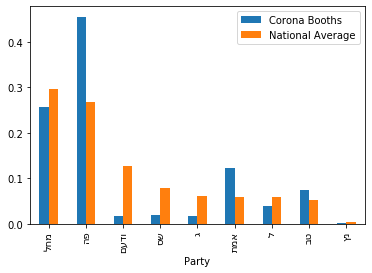

In [220]:
df99.plot(x ='Party', y=['Corona Booths','National Average'], kind = 'bar')
plt.show()